<a href="https://colab.research.google.com/github/sumukhasrivatsa/Coursera-Tasks/blob/master/To_predict_if_a_bank_member_will_remain_loyal_to_the_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
536/536 [==============================] - 4s 3ms/step - loss: 0.6226 - accuracy: 0.7050 - val_loss: 0.5333 - val_accuracy: 0.7955
Epoch 2/10
536/536 [==============================] - 1s 2ms/step - loss: 0.5347 - accuracy: 0.7883 - val_loss: 0.4957 - val_accuracy: 0.7955
Epoch 3/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4828 - accuracy: 0.7992 - val_loss: 0.4750 - val_accuracy: 0.7955
Epoch 4/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4708 - accuracy: 0.7933 - val_loss: 0.4609 - val_accuracy: 0.7952
Epoch 5/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4646 - accuracy: 0.7882 - val_loss: 0.4508 - val_accuracy: 0.8023
Epoch 6/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4607 - accuracy: 0.8000 - val_loss: 0.4426 - val_accuracy: 0.8092
Epoch 7/10
536/536 [==============================] - 1s 2ms/step - loss: 0.4564 - accuracy: 0.8035 - val_loss: 0.4358 - val_accuracy: 0.8122
Epoch 

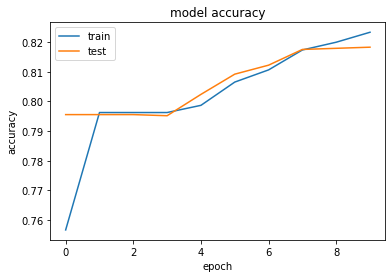

0.8275


In [51]:
from re import X
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset=pd.read_csv('/content/Churn_Modelling.csv')
x_variable=dataset.iloc[:,3:13]
y_variable=dataset.iloc[:,13]
x_variable

geography=pd.get_dummies(dataset['Geography'],drop_first=True)
gender=pd.get_dummies(dataset['Gender'],drop_first=True)

new=pd.concat([x_variable,geography,gender],axis=1)
new=new.drop(['Geography','Gender'],axis=1)
new

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new,y_variable, test_size = 0.2, random_state = 0)

#feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
pd.DataFrame(X_train)
X_test=scaler.fit_transform(X_test)

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


classifier=Sequential()
classifier.add(Dense(units=6, kernel_initializer='he_uniform',activation='relu',input_dim = 11))
classifier.add(Dense(units=6, kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform',activation='sigmoid'))

classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
model=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=10)
print(model.history.keys())

plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



y_predicted=classifier.predict(X_test)
y_predicted = (y_predicted>0.5)

from sklearn.metrics import accuracy_score
accuracyscore=accuracy_score(y_predicted,y_test)
print(accuracyscore)